In [ ]:
! pip install git+https://github.com/philferriere/cocoapi.git#egg=pycocotools^&subdirectory=PythonAPI

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

C:\Users\ashwi\Anaconda3\lib\site-packages\pycocotools\coco.py:49: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\ashwi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ashwi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\ashwi\An

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

C:\Users\ashwi\Anaconda3\lib\site-packages\pycocotools\coco.py:49: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\ashwi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ashwi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\ashwi\An

In [30]:
dataDir='train2017'
dataType='train2017'
annFile='{}/annotations/stuff_{}.json'.format(dataDir,dataType)

In [31]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=11.96s)
creating index...
index created!


In [32]:
img_ids = 9
annotation_ids = coco.getAnnIds(img_ids)
annotations = coco.loadAnns(annotation_ids)

for i in range(len(annotations)):
    entity_id = annotations[i]["category_id"]
    entity = coco.loadCats(entity_id)[0]["name"]
    print("{}: {}".format(i, entity))

0: food-other
1: plastic
2: table
3: other


In [33]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
banner blanket branch bridge building-other bush cabinet cage cardboard carpet ceiling-other ceiling-tile cloth clothes clouds counter cupboard curtain desk-stuff dirt door-stuff fence floor-marble floor-other floor-stone floor-tile floor-wood flower fog food-other fruit furniture-other grass gravel ground-other hill house leaves light mat metal mirror-stuff moss mountain mud napkin net paper pavement pillow plant-other plastic platform playingfield railing railroad river road rock roof rug salad sand sea shelf sky-other skyscraper snow solid-other stairs stone straw structural-other table tent textile-other towel tree vegetable wall-brick wall-concrete wall-other wall-panel wall-stone wall-tile wall-wood water-other waterdrops window-blind window-other wood other

COCO supercategories: 
furniture-stuff solid plant floor ceiling window ground sky wall other raw-material building structural food-stuff water textile


In [34]:
outdoor_stuff = set(["water", "ground", "solid", "sky", "plant", "structural", "building"])
indoor_stuff = set(["food-stuff", "textile", "furniture-stuff", "window", "floor", "ceiling", "wall", "raw-material"])

## Custom For Our Purpose

### Generate Set of Outdoor and Indoor Images

In [84]:
outdoor_id = coco.getCatIds(supNms=outdoor_stuff)
indoor_id = coco.getCatIds(supNms=indoor_stuff)

outdoor_img_ids = set()
for cat_id in outdoor_id:
    outdoor_img_ids = outdoor_img_ids.union(set(coco.getImgIds(catIds = cat_id)));
    
indoor_img_ids = set()
for cat_id in indoor_id:
    indoor_img_ids = indoor_img_ids.union(set(coco.getImgIds(catIds = cat_id)));

only_outdoor_imgs = outdoor_img_ids - indoor_img_ids
only_outdoor_imgs = list(only_outdoor_imgs)

only_indoor_imgs = indoor_img_ids - outdoor_img_ids
only_indoor_imgs = list(only_indoor_imgs)

### Generate Outdoor / Indoor and Person / No Person Combinations

In [103]:
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=17.05s)
creating index...
index created!


In [104]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory outdoor person vehicle electronic appliance sports kitchen food indoor furniture animal


In [124]:
person_id = coco.getCatIds(catNms=['person'])
only_people_imgs = set(coco.getImgIds(catIds = person_id))
all_img_ids = set(coco.getImgIds())
no_people_imgs = list(all_img_ids - only_people_imgs)
only_people_imgs = list(only_people_imgs)

In [140]:
outdoor_people_imgs = list(set(only_outdoor_imgs) & (set(only_people_imgs)))
outdoor_no_people_imgs = list(set(only_outdoor_imgs) & (set(no_people_imgs)))
indoor_people_imgs = list(set(only_indoor_imgs) & (set(only_people_imgs)))
indoor_no_people_imgs = list(set(only_indoor_imgs) & (set(no_people_imgs)))

In [149]:
annotation_ids = coco.getAnnIds(outdoor_people_imgs[0])
annotations = coco.loadAnns(annotation_ids)

for i in range(len(annotations)):
    entity_id = annotations[i]["category_id"]
    entity = coco.loadCats(entity_id)[0]["supercategory"]
    print("{}: {}".format(i, entity))

0: sports
1: person
2: sports


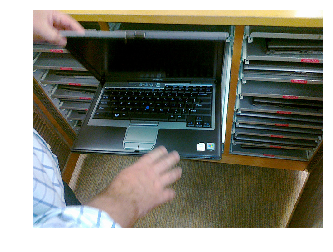

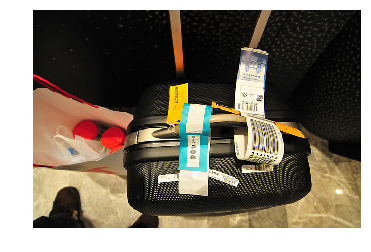

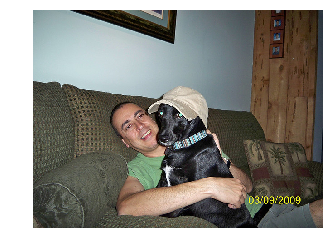

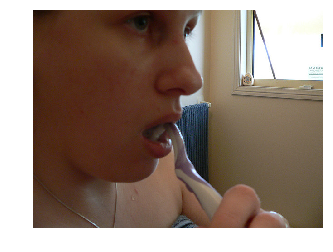

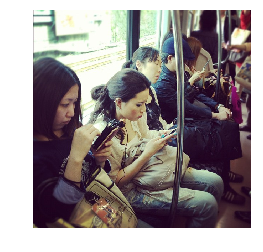

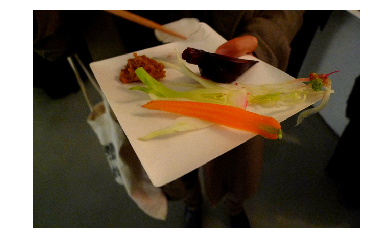

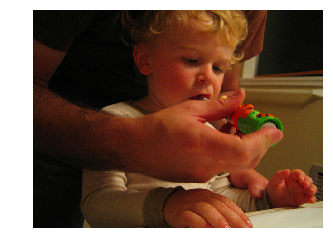

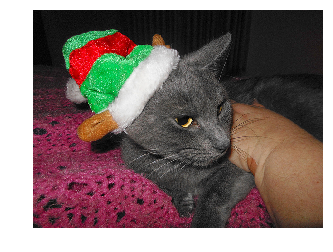

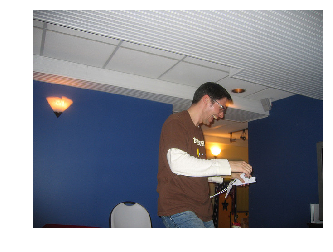

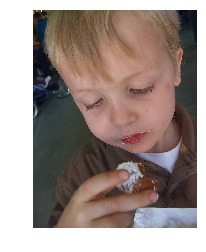

In [146]:
for i in range(0, 10):
    img_id = indoor_people_imgs[i]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()

In [148]:
I

array([[[106, 111,  71],
        [ 53,  47,  13],
        [ 96,  61,  41],
        ...,
        [ 12,  18,  32],
        [ 14,  17,  32],
        [ 14,  16,  31]],

       [[144, 149, 109],
        [ 85,  85,  49],
        [ 75,  49,  24],
        ...,
        [ 11,  17,  31],
        [ 14,  17,  32],
        [ 15,  17,  32]],

       [[139, 141, 104],
        [122, 130,  91],
        [ 63,  50,  18],
        ...,
        [ 13,  16,  31],
        [ 14,  17,  32],
        [ 16,  18,  33]],

       ...,

       [[ 53,  59,  59],
        [ 54,  60,  60],
        [ 54,  60,  60],
        ...,
        [102,  99,  94],
        [104, 101,  96],
        [110, 107, 102]],

       [[ 53,  57,  58],
        [ 55,  59,  60],
        [ 55,  59,  60],
        ...,
        [103, 100,  95],
        [102,  99,  94],
        [104, 101,  96]],

       [[ 55,  56,  58],
        [ 56,  57,  59],
        [ 55,  59,  60],
        ...,
        [111, 108, 103],
        [108, 105, 100],
        [104, 101,  96]]

## To and from Pickles

In [153]:
import pickle

In [154]:
outdoor_person = list()
entities = ["outdoor", "person"]
for j in range(120):
    img_id = outdoor_people_imgs[j]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    outdoor_person.append((I,entities))
    
with open('outdoorPerson.pkl', 'wb') as f:
    pickle.dump(outdoor_person, f)

In [155]:
outdoor_no_person = list()
entities = ["outdoor", "no-person"]
for j in range(120):
    img_id = outdoor_no_people_imgs[j]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    outdoor_no_person.append((I,entities))
    
with open('outdoorNoPerson.pkl', 'wb') as f:
    pickle.dump(outdoor_no_person, f)

In [156]:
indoor_person = list()
entities = ["indoor", "person"]
for j in range(120):
    img_id = indoor_people_imgs[j]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    indoor_person.append((I,entities))
    
with open('indoorPerson.pkl', 'wb') as f:
    pickle.dump(indoor_person, f)

In [157]:
indoor_no_person = list()
entities = ["indoor", "no-person"]
for j in range(120):
    img_id = indoor_no_people_imgs[j]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    indoor_no_person.append((I,entities))
    
with open('indoorNoPerson.pkl', 'wb') as f:
    pickle.dump(indoor_no_person, f)

In [12]:
with open('personimagesTest.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [13]:
mynewlist

NameError: name 'mynewlist' is not defined

In [12]:
nopersonimages = list()
for j in range(120, 160):
    img_id = no_person_outdoor_img_ids[j]
    img = coco.loadImgs(img_id)[0]
    I = io.imread(img['coco_url'])
    entities = list()
    img_ids = img_id
    annotation_ids = coco.getAnnIds(img_ids)
    annotations = coco.loadAnns(annotation_ids)
    for i in range(len(annotations)):
        entity_id = annotations[i]["category_id"]
        entity = coco.loadCats(entity_id)[0]["supercategory"]
        entities.append(entity)
    nopersonimages.append((I,entities))
    print(j)

NameError: name 'no_person_outdoor_img_ids' is not defined

In [20]:
import pickle
with open('nopersonimagesTest.pkl', 'wb') as f:
    pickle.dump(nopersonimages, f)